Random Forest Model

In [2]:
# Import needed dependencies
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras import layers, models
from sklearn.ensemble import RandomForestClassifier
import csv
import os
from datetime import datetime

In [3]:
# Read in the data:

# Loading Fashion MNIST dataset from TensorFlow datasets
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load training and testing dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# Normalize pixel values of images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Check shape of dataset
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


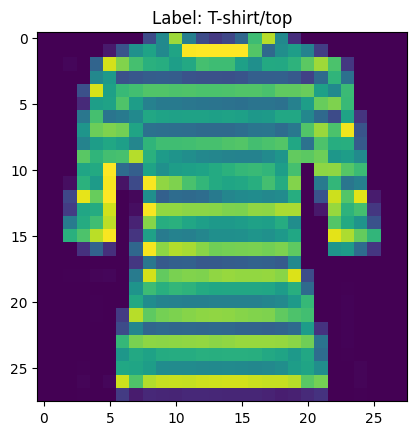

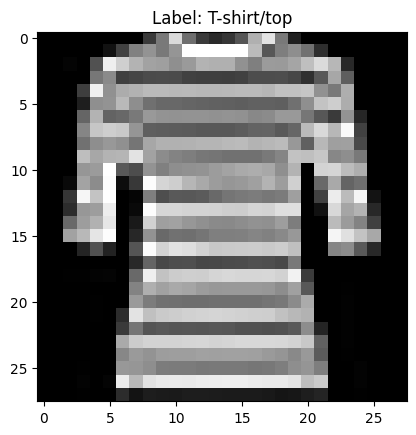

In [5]:
# Defining label names for Fashion MNIST dataset to check images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Checking and displaying images with corresponding labels
    # not all images will be present as I iterated through the image index values to find specific labels
    
# image_index = 10
# image = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 29
# image0 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image0)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 12
# image1 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image1)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 30
# image1 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image1)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 40
# image2 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image2)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 20
# image3 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image3)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 90
# image4 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image4)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 100
# image5 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image5)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 16
# image6 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image6)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 31
# image7 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image7)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

#image from T-shirt/Top label
image_index = 26
image8 = train_images[image_index, :].reshape((28, 28))
plt.imshow(image8)
plt.title(f'Label: {class_names[train_labels[image_index]]}')
plt.show()

#image in greyscale to show how the model reads it in
image_index = 26
image9 = train_images[image_index, :].reshape((28, 28))
plt.imshow(image9, cmap='grey')
plt.title(f'Label: {class_names[train_labels[image_index]]}')
plt.show()

In [6]:
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)

In [7]:
y_train = train_labels
y_test = test_labels

In [8]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

Training Random Forest Classifier...


RandomForestClassifier(random_state=42)

In [10]:
print("Evaluating model on validation data...")
val_predictions = rf_model.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Evaluating model on validation data...
Validation Accuracy: 0.8812


In [11]:
print("Evaluating model on test data...")
test_predictions = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

Evaluating model on test data...
Test Accuracy: 0.8739


In [12]:
print("\nClassification Report:")
print(classification_report(y_test, test_predictions, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.83      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.77      0.80      0.78      1000
       Dress       0.87      0.90      0.88      1000
        Coat       0.76      0.81      0.79      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.59      0.64      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [13]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))


Confusion Matrix:
[[851   0  12  34   4   1  85   0  13   0]
 [  5 956   6  24   3   0   5   0   1   0]
 [ 13   0 801  11 117   0  55   0   3   0]
 [ 18   2   8 900  34   0  36   0   2   0]
 [  1   0  95  37 812   0  51   0   4   0]
 [  0   0   0   1   0 958   0  27   2  12]
 [152   2 118  28  92   0 590   0  18   0]
 [  0   0   0   0   0  10   0 952   0  38]
 [  0   2   3   2   4   2   8   5 973   1]
 [  0   0   1   0   0   8   0  43   2 946]]
